# Multi-variate linear regression

## 1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n x 1$-vector $x=(x_1,x_2,...,x_n)$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (1)
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n x 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2)
$$
or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity which will be considered during the second session.

The max-likelihood criteria:
$$
\prod\limits_i p(y^i|x^i,w,\sigma)\to \max.
$$
or
$$
\log\left(\prod\limits_i p(y^i|x^i,w,\sigma)\right)=\sum\limits_i \log\left({\cal N}(y^i|w^T x^i,\sigma^2)\right)=
$$$$
=-\sum\limits_i \frac{(y^i-w^T x^i)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})=-\frac{RSS(w)}{2\sigma^2}-N \log(\sigma)-N \to\max
$$
Which is in turn equivalent to
$$
RSS(w)\to \min,
$$
i.e. least-square criteria plus (just like in case of the bi-variate regression)
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min,
$$
i.e. the estimate $\hat{\sigma}$ could be found as
$$
\frac{\partial\left[\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\hat{\sigma})\right]}{\partial \hat{\sigma}}=0,
$$$$
-\frac{RSS(\hat{w})}{\hat{\sigma}^3}+\frac{N}{\hat{\sigma}}=0,
$$$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N}. \hspace{5ex} (4)
$$

Also an unbiased adjusted estimate is know to be
$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N-n}. \hspace{5ex} (4')
$$

## 2. Simple Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

import statsmodels.formula.api as smf
import urllib
#url = "https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab3/L3.csv"
#f = urllib.urlopen(url)

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'C:\\Users\\fomyt\\Documents\\ADS_Fall2016\\Notebook\\data'

In [3]:
NYC = pd.read_csv(path + '\\2016_02_18_sintetic.csv', index_col=0)
zip_NY = NYC.postalCode.unique()
Demographic = pd.read_csv(path + '\\Demographic_2014.csv', low_memory=False)
variable_names=list(Demographic.iloc[0,:])
#first row is variable name
Demographic=Demographic.iloc[1:,:]
Demographic.index=range(len(Demographic))
#get zipcode from the strange string
zipcode=pd.DataFrame([int(Demographic.loc[i,'Name of Area'].split(" ")[0]) for i in range(len(Demographic))])
Demographic.columns=variable_names
Demographic=pd.concat((zipcode,Demographic),axis=1)
Demographic=Demographic.rename(columns={0:'zipcode'})

In [4]:
Demo_NY = Demographic[Demographic.loc[:,'zipcode'].isin(zip_NY)]
Demo_NY.index=range(len(Demo_NY))

In [5]:
#Features we may need to use from census. 
population=['SE_T001_001','SE_T009_002','SE_T009_003','SE_T009_004','SE_T009_005']
#Total population, #Total Population under 18; 18-34; 35-64;65+#

race=['SE_T013_001','SE_T013_002','SE_T013_003','SE_T013_004','SE_T013_005','SE_T013_006','SE_T013_007','SE_T013_008']
#Total,White Along, Black or African American, American Indian and Alaska Native Alone, Asian Alone, 
#Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More races

marriage=['SE_T017_001','SE_T017_002','SE_T017_003','SE_T017_004','SE_T017_007','SE_T018_002']
# Households, Family households, Married-couple Family, Single-parent family, Nofamily Households, Household with one or more people under 18

education=['SE_T025_001','SE_T025_002','SE_T025_003','SE_T025_004','SE_T025_005','SE_T025_006','SE_T025_008','SE_T025_007']
# Population over 25: less than high school, high school, some college, Bechelor, Master, Professional school, Doctorate

employment=['SE_T037_001','SE_T037_002','SET037_003']
#Civilian Population In Labor Force 16 Years And Over: employed; unemployed.

income=['SE_T056_001','SE_T056_002','SE_T056_003','SE_T056_004','SE_T056_005','SE_T056_006','SE_T056_007',
       'SE_T056_008','SE_T056_009','SE_T056_010','SE_T056_011','SE_T056_012','SE_T056_013'
       'SE_T056_014','SE_T056_015','SE_T056_016','SE_T056_017',]
#Households, Households: Less than $10,000;Households: $10,000 to $14,999;Households: $15,000 to $19,999
#$20,000 to $24,999;Households: $25,000 to $29,999;Households: $30,000 to $34,999;Households: $35,000 to $39,999
 #Households: $40,000 to $44,999; Households: $45,000 to $49,999;Households: $50,000 to $59,999
# Households: $60,000 to $74,999 ;Households: $75,000 to $99,999 ; Households: $100,000 to $124,999
#$125,000 to $149,999; $150,000 to $199,999 ;$200,000 or More

income_per_capita=['SE_T083_001']
#Per capita income (In 2014 Inflation adjusted dollars)

insurance=['SE_T145_001','SE_T145_002','SE_T145_003','SE_T145_004','SE_T145_005']
# Total; No Health Insurance Coverage;With Health Insurance Coverage;
#With Health Insurance Coverage: Public Health Coverage;With Health Insurance Coverage: Private Health Insurance

born_place=['SE_T133_001','SE_T133_002','SE_T133_003','SE_T133_004','SE_T133_005']
#Total; Total Population:Native Born;Foreign Born
#Total Population: Foreign Born: Naturalized Citizen; Not a Citizen

transportation_to_work=['SE_T128_001','SE_T128_002','SE_T128_003','SE_T128_004','SE_T128_005','SE_T128_006'
                        ,'SE_T128_007','SE_T128_008']
#Workers 16 Years and over:
#Workers 16 Years and over: Car, truck, or van;Drove Alone;Carpooled;Public transportation (Includes Taxicab)
#Motorcycle;Bicycle;Walked;Other means; Worked at home

time_on_road_towork=['SE_T129_001','SE_T129_002','SE_T129_003','SE_T129_004','SE_T129_005',
                     'SE_T129_006','SE_T129_007','SE_T129_008','SE_T129_009','SE_T129_010']
# Workers 16 Years and over:
#Workers 16 Years and over: Did not work at home;Less than 10 minutes;10 to 19 minutes;20 to 29 minutes
#30 to 39 minutes;40 to 59 minutes;60 to 89 minutes;90 or More minutes
#Worked at home

type_house=['SE_T095_003','SE_T094_001','SE_T094_002','SE_T094_003']
#Vacant houses; Occupied houses; Owner Occupied; Renter Occupied

House_price_owner=['SE_T100_001','SE_T100_002','SE_T100_003''SE_T100_004','SE_T100_005',
                  'SE_T100_006','SE_T100_007','SE_T100_008','SE_T100_009','SE_T100_010']
#Owner-occupied housing units:Less than $20,000;$20,000 to $49,999;$50,000 to $99,999;$100,000 to $149,999
#$150,000 to $299,999;300,000 to $499,999;500,000 to $749,999;750,000 to $999,999;1,000,000 or More

Rent_price=['SE_T102_001','SE_T102_002','SE_T102_003','SE_T102_004','SE_T102_005',
            'SE_T102_006','SE_T102_007','SE_T102_008','SE_T102_009']

#Renter-occupied housing units with cash rent: Less than $300; $300 to $599;$600 to $799;$800 to $999
#$1,000 to $1,249;$1,250 to $1,499;$1,500 to $1,999; $2,000 or More


veteran=['SE_T131_001','SE_T131_002','SE_T131_003','SE_T131_004','SE_T131_005','SE_T131_006','SE_T131_007']
#Civilian Population 18 Years and over:
#Civilian Population 18 Years and over: Veteran;Veteran: 18 to 64 Years; 65 Years and over
#Civilian Population 18 Years and over: Nonveteran; Nonveteran: 18 to 64 Years; 65 Years and over

other=['SE_T142_001','SE_T157_001']
#Owner-ocupied units; Gini index

#zipcode:10020, ..., we have two zipcodes where nobody lives. (population=0)

In [7]:
data1 = Demo_NY.loc[:,['zipcode']+income_per_capita+education]
data1.rename(columns= dict(zip(['zipcode']+income_per_capita+education,['Zipcode','IncomePerCapita','PopOver25','LessThanHS', 'HighSchool',
                'SomeCollege', 'Bachelor', 'Master', 'Doctorate', 'ProfSchool'])), inplace=True)
data1.to_csv(path + '\\IncomeEduReg.csv', index=False)

In [8]:
marriage=['SE_T017_001','SE_T017_002','SE_T017_003','SE_T017_004','SE_T017_007']
# Households, Family households, Married-couple Family, Single-parent family, Nofamily Households, Household with one or more people under 18
employment=['SE_T037_001','SE_T037_002','SE_T037_003']
#Civilian Population In Labor Force 16 Years And Over: employed; unemployed.

In [9]:
data2 = Demo_NY.loc[:,['zipcode']+income_per_capita+marriage]
data3 = Demo_NY.loc[:,['zipcode']+income_per_capita+employment]

In [10]:
data2.head()

,zipcode,SE_T083_001,SE_T017_001,SE_T017_002,SE_T017_003,SE_T017_004,SE_T017_007
0,10001,77512,11169,3348,2301,1047,7821
1,10002,26905,32550,17454,10054,7400,15096
2,10003,79088,27564,7396,6120,1276,20168
3,10004,98020,1580,531,432,99,1049
4,10005,99633,4100,1056,967,89,3044


In [11]:
data2.rename(columns= dict(zip(['zipcode']+income_per_capita+marriage, ['Zipcode','IncomePerCapita', 'Households', 'Family', 'MarriedCouple',
                 'SingleParent', 'NoFamily'])), inplace=True)
data2.head()

,Zipcode,IncomePerCapita,Households,Family,MarriedCouple,SingleParent,NoFamily
0,10001,77512,11169,3348,2301,1047,7821
1,10002,26905,32550,17454,10054,7400,15096
2,10003,79088,27564,7396,6120,1276,20168
3,10004,98020,1580,531,432,99,1049
4,10005,99633,4100,1056,967,89,3044


In [12]:
type_house=['SE_T095_003','SE_T094_001','SE_T094_002','SE_T094_003']
#Vacant houses; Occupied houses; Owner Occupied; Renter Occupied

In [10]:
insurance=['SE_T145_001','SE_T145_002','SE_T145_003','SE_T145_004','SE_T145_005']
# Total; No Health Insurance Coverage;With Health Insurance Coverage;
#With Health Insurance Coverage: Public Health Coverage;With Health Insurance Coverage: Private Health Insurance
data5 = Demo_NY.loc[:,['zipcode']+income_per_capita+insurance]
data5.rename(columns = dict(zip(['zipcode']+income_per_capita+insurance, ['Zipcode', 'IncomePerCapita',
        'Total','NoCoverage','WithCoverage','Public','Private'])), inplace=True)
data5.head()
data5.to_csv(path +'\\IncomeInsReg.csv', index=False)

In [13]:
data4 = Demo_NY.loc[:,['zipcode']+income_per_capita+type_house]
data4.rename(columns = dict(zip(['zipcode']+income_per_capita+type_house, ['Zipcode', 'IncomePerCapita',
             'Vacant', 'Occupied', 'OwnerOccupied', 'RenterOccupied'])), inplace=True)
data4.head()

,Zipcode,IncomePerCapita,Vacant,Occupied,OwnerOccupied,RenterOccupied
0,10001,77512,1469,11169,3055,8114
1,10002,26905,2731,32550,4370,28180
2,10003,79088,3664,27564,8537,19027
3,10004,98020,523,1580,462,1118
4,10005,99633,1014,4100,544,3556


In [14]:
data4.to_csv(path + '\\IncomeHouseReg.csv', index= False)

In [15]:
data3.rename(columns = dict(zip(['zipcode']+income_per_capita+employment,['Zipcode', 'IncomePerCapita', 'InLaborForce',
                                            'Employed','Unemployed'])),inplace=True)
data3.head()

,Zipcode,IncomePerCapita,InLaborForce,Employed,Unemployed
0,10001,77512,14547,13276,1271
1,10002,26905,38902,34605,4297
2,10003,79088,37390,34937,2453
3,10004,98020,2273,2067,206
4,10005,99633,6020,5828,192


In [16]:
data2.to_csv(path + '\\IncomeFamilyReg.csv', index=False)
data3.to_csv(path + '\\IncomeEmpReg.csv', index=False)

In [17]:
data = pd.read_csv(path+'\\L3.csv', index_col=0)
data.head()

,y,x1,x2,x3,x4,x5
1,0.891224,11.310117,7.304922,25.138700,51.186434,12.365874
2,1.529763,28.867388,-2.097258,15.338794,-14.225474,33.227090
3,0.720653,7.622209,8.467495,32.239993,-40.313527,10.333777
4,0.953661,17.399920,-4.881389,56.865684,52.465955,18.922631
5,-2.605897,-6.241537,-9.394398,22.004642,58.642567,-7.759056


## (A) Method 1, run regression with statsmodels.formula.api (smf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     416.5
Date:                Sat, 10 Sep 2016   Prob (F-statistic):           1.71e-62
Time:                        13:57:58   Log-Likelihood:                 15.219
No. Observations:                 100   AIC:                            -18.44
Df Residuals:                      94   BIC:                            -2.807
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6403      0.053    -30.765      0.0

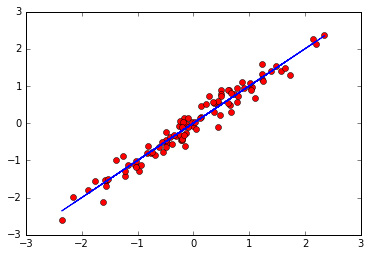

In [18]:
lm = smf.ols(formula = 'y ~ x1 + x2 + x3 + x4 + x5', data = data).fit()
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b')
print(lm.summary())

In [19]:
pd.DataFrame({'True_y':data.y,'Predict_y':lmy, 'diff':(data.y - lmy)}).head()

,Predict_y,True_y,diff
1,0.488309,0.891224,0.402915
2,1.476146,1.529763,0.053617
3,0.280776,0.720653,0.439877
4,1.028406,0.953661,-0.074745
5,-2.358620,-2.605897,-0.247277


## (B) Method 2, matrix computation: $\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $
### Note: we have to include the intercept term in matrix X along with all variables $x_i$

**WARNING**: If you wrote **X = data**, python will NOT generate a copy but simply treat them the same, EVERY change you made to **X** will reflect on **data**, so please pay attention if you want to keep original dataset untouched

In [20]:
X = data.copy()

In [21]:
X.y = 1  # This is the intercept term, simply replace all y value with 1 for computation
X.rename(columns = {'y':'intercept'}, inplace = True)
X.head()

,intercept,x1,x2,x3,x4,x5
1,1,11.310117,7.304922,25.138700,51.186434,12.365874
2,1,28.867388,-2.097258,15.338794,-14.225474,33.227090
3,1,7.622209,8.467495,32.239993,-40.313527,10.333777
4,1,17.399920,-4.881389,56.865684,52.465955,18.922631
5,1,-6.241537,-9.394398,22.004642,58.642567,-7.759056


In [22]:
X = np.mat(X)
Y = np.mat(data.y).T
w = np.linalg.inv(X.T * X) * X.T * Y
# an alternative method is using pow(X.T*X, -1) functin, where pow stands for power
w

matrix([[ -1.64030170e+00],
        [  1.04533310e-01],
        [  5.99897894e-02],
        [  2.04994399e-02],
        [  4.63672579e-04],
        [ -2.50344998e-03]])

### Compare the coefficients obtained through different methods

In [23]:
pd.DataFrame({'Matrix_Computation':w.tolist(), 'Regression':lm.params})

,Matrix_Computation,Regression
Intercept,[-1.64030169786],-1.640302
x1,[0.104533310307],0.104533
x2,[0.0599897893846],0.059990
x3,[0.0204994398765],0.020499
x4,[0.000463672579144],0.000464
x5,[-0.00250344998097],-0.002503


### Note that the coefficients of $x_4$ and $x_5$ are very close to 0, bringing up the question whether dropping them would significantly affect the model

# 3. Explanation of R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

### Usually, $R^2$ can be viewed as a measurement of how much information of response variable y is provided by our regression model

In [24]:
def CalcR2(data, length=5):
    # Default length 5, in other words we include ALL variables for this particular dataset
    
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(length):
        string += str(i+1)
        
    # Next convert this string into our formula
    formula = 'y ~ x' + ' + x'.join(string)
    
    # Perform regression
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared

In [25]:
R2 = []
# Include the independent variable one by one and see how the R^2 changes accordingly
for i in range(5):
    R2.append(CalcR2(data, i+1))

R2

[0.39592674239373493,
 0.79317132702623372,
 0.95638945120716023,
 0.9566617582452267,
 0.95681482606750901]

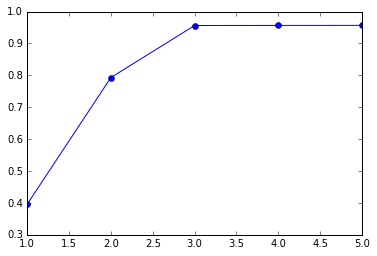

In [26]:
plt.plot(range(1,6), R2, marker = 'o')

### Two observations:
* $R^2$ increases as the model becomes more complex
* The marginal increase becomes trivia after 3

### So for this dataset, a 3-variable model ('$y \sim x_1 + x_2 + x_3$') is good enough

# 4. Feature scaling

Often in order to get some sense out of the values of $w_j$ one might want to normalize the features first, brinding them on the same scale. For example one can standardszation, transforming independent variables into their standard scores (also called z-scores, normal scores):
$$
x_j^*=\frac{x_j-\overline{x}_j}{\sigma_j}
$$
where $\overline{x}_j=E[X_j]$ and $\sigma_j=std[X_j]$ are the corresponding sample mean and standard deviation. This however does not apply to a constant dummy variable corresponding to the intercept term if present. One might omit this dummy variable in case if responce variable is also standardized (then it's mean is also zero and there is no need for an intercept). 

Then, the resulting coefficients $\hat{w}_j$ could be interpreted as a relative (or absolute if the output variable is also standardized) strength of each regressor's impact on the responce variable $x_j$.

In [27]:
df = data.loc[:,['x1','x2','x3']]
df = (df - df.mean()) / df.std()
df.head()

,x1,x2,x3
1,0.210419,0.680516,-0.246654
2,3.030311,-0.195378,-0.743884
3,-0.381900,0.788820,0.113653
4,1.188509,-0.454743,1.363119
5,-2.608571,-0.875169,-0.405671


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     701.8
Date:                Sat, 10 Sep 2016   Prob (F-statistic):           3.87e-65
Time:                        13:57:59   Log-Likelihood:                 14.729
No. Observations:                 100   AIC:                            -21.46
Df Residuals:                      96   BIC:                            -11.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.469e-18      0.021   1.63e-16      1.000        -0.042     0.042
x1             0.6324      0.021     29.522      0.000         0.590     0.675
x2             0.6334      0.021     29.571      0.000         0.591     0.676
x3             0.4060      0.021     18.955      0.000         0.364     0.449
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.592
Skew:                          -0.185   Prob(JB):                        0.744
Kurtosis:                       2.925   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

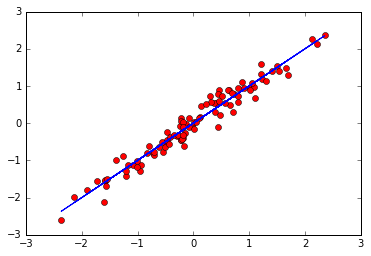

In [28]:
data2 = pd.concat([data.y, df], axis = 1)
lm = smf.ols(formula='y ~ x1 + x2 + x3', data = data2).fit()
lmy = lm.predict(data2)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()